<a href="https://colab.research.google.com/github/MK316/workshops/blob/main/20230126_yonsei/ILIS_139th_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🌱 **주제: 디지털시대의 음성언어자료 이해 및 활용 [1]** 
(Leveraging the Potential of Spoken Data in the AI-Powered Digital Age)

# Introduction

In [ ]:
#@markdown 💠 Lecture slides (#1~4)
from IPython.display import Image

pages = "8" #@param = ["0", "1", "2", "3", "4", "5","6", "7","8"]
adds = ['https://github.com/MK316/workshops/raw/main/20230126_yonsei/slides/map_wide.png',
        'https://github.com/MK316/workshops/raw/main/20230126_yonsei/slides/slides.001.jpeg',        
        'https://github.com/MK316/workshops/raw/main/20230126_yonsei/slides/slides.002.jpeg',
        'https://github.com/MK316/workshops/raw/main/20230126_yonsei/slides/slides.003.jpeg',
        'https://github.com/MK316/workshops/raw/main/20230126_yonsei/slides/slides.004.jpeg',
        'https://github.com/MK316/workshops/raw/main/20230126_yonsei/slides/slides.005.jpeg',
        'https://github.com/MK316/workshops/raw/main/20230126_yonsei/slides/slides.006.jpeg',
        'https://github.com/MK316/workshops/raw/main/20230126_yonsei/slides/slides.007.jpeg',
        'https://github.com/MK316/workshops/raw/main/20230126_yonsei/slides/slides.008.jpeg']

if pages == "0":
  add = adds[0]
elif pages == "1":
  add = adds[1]
elif pages == "2":
  add = adds[2]
elif pages == "3":
  add = adds[3]
elif pages == "4":
  add = adds[4]
elif pages == "5":
  add = adds[5]
elif pages == "6":
  add = adds[6] 
elif pages == "7":
  add = adds[7] 
elif pages == "8":
  add = adds[8] 
  
Image(url=add, width=800, height=500)


---
# 📘 Topic [1]: Written language vs. Spoken language as digital data

---


## Data size: characters vs. audio as digital data

1 KB = 1,024 bytes  
1 MB =  (1,024)² = 1,048,576 bytes  
1 GB = (1,024)³

In [16]:
#@markdown 🔄 [1] Memory size of a text:
import sys

ask = input("Type anything to check the memory size:  ")

size = sys.getsizeof(ask)
print('It takes %s bytes.'%size)

Type anything to check the memory size:  안녕하세요
It takes 84 bytes.


[2] Memory size of an audio (speech)

In [17]:
#@markdown 🔄 Making functions: etts('text'), ktts('text')
%%capture
!pip install gTTS
from gtts import gTTS
from IPython.display import Audio

def etts(text):
  text_to_say = text

  gtts_object = gTTS(text = text_to_say,
                     lang = "en", tld = "us",
                    slow = False)
  
  gtts_object.save("E-audio.mp3")
  return Audio("E-audio.mp3")


def ktts(text):
  text_to_say = text

  gtts_object = gTTS(text = text_to_say,
                     lang = "ko",
                    slow = False)
  
  gtts_object.save("K-audio.mp3")
  return Audio("K-audio.mp3")

In [ ]:
#@markdown 🔄 TTS (synthesize speech)

language = "ko" #@param ["en","ko"]

mytext = input("Type text to create an audio:  ")

if language == "en":
  etts(mytext)
  myaudio = "E-audio.mp3"
elif language == "ko":
  ktts(mytext)
  myaudio = "K-audio.mp3"

import os
audio_file = myaudio # replace with the name of your audio file

# Get the file size in bytes
file_size = os.path.getsize(audio_file)

# Print the file size
print("="*50)
print("File size: ", file_size, "bytes")
Audio(myaudio)

**Note:** gTTS generated audio is for SOUND PLAY (not for ANALYSIS) and is compressed in size.

=> We can covert gTTS sound to a readable audio file.   

## What is sound? (Sound data)  

In [19]:
#@markdown 🔄 (1/3) Install {pydub}
%%capture
!pip install pydub
from pydub import AudioSegment

In [28]:
#@markdown 🔄 (2/3) Specify file names to convert: 📌 K-audio.mp3 => save as "sample.wav"
inaudio = input("Type the input file name to convert: ")
outaudio = input("Type the output file name to save: ")
sound = AudioSegment.from_mp3(inaudio)
sound.export(outaudio, format="wav")

Type the input file name to convert: K-audio.mp3
Type the output file name to save: sample.wav


<_io.BufferedRandom name='sample.wav'>

Sapling rate:  24000


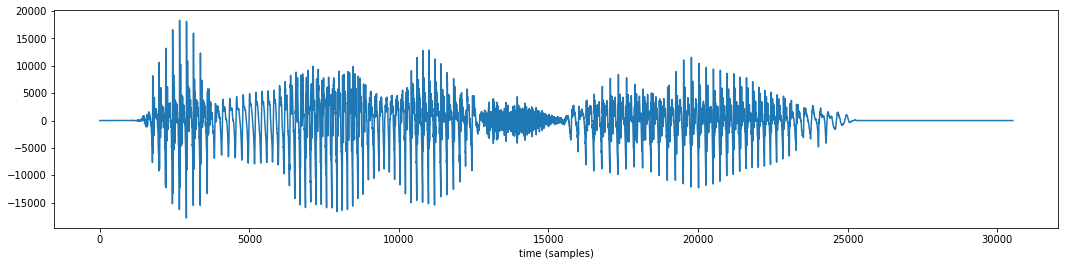

In [29]:
#@markdown 🔄 (3/3) Display waveform: 
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

audio = AudioSegment.from_file(outaudio, format="wav")
print("Sapling rate: ", audio.frame_rate)
fs, data = wavfile.read(outaudio) # replace with the name of your audio file
plt.figure(figsize=(18,4))
plt.xlabel('time (samples)')
plt.plot(data)
plt.show()


Note: time (in seconds) = samples / sampling rate (24kHz)

Start time (sec.): 0.5
End time(sec.): 0.82
Duration in samples: from 12000.0 to 19680.0


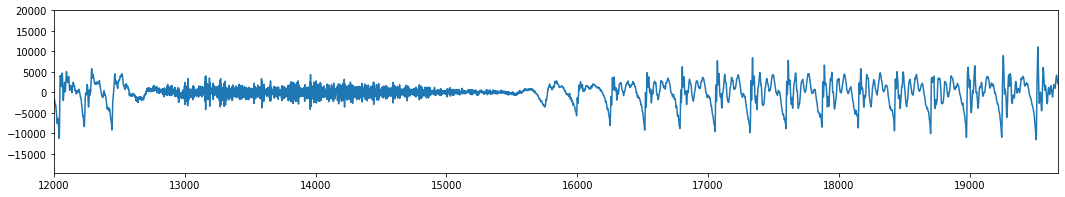

In [30]:
#@markdown Zoom in the waveform (0.52~0.8 seconds = 12000 ~ 19680 samples)
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Read the waveform data
rate, data = wavfile.read('/content/sample.wav')

# Plot the waveform
fig, ax = plt.subplots(figsize = (18,3))

ax.plot(data)

st = input("Start time (sec.): ")
et = input("End time(sec.): ")
# Set the x-axis limits to zoom in on a specific time period

stsmp = (24000*(float(st)*1000))/1000
etsmp = (24000*(float(et)*1000))/1000
print("Duration in samples: from {} to {}".format(stsmp,etsmp))

start_time = float(st) # start time in seconds
end_time = float(et) # end time in seconds
ax.set_xlim(start_time * rate, end_time * rate)


plt.show()



---


# 📘 Topic [2]: Understanding sound wave


---



### A. 소리 = 음파 (Sound wave: air vibration) 
- **_Sound is invisible._**

=> Make vibration visible: [videolink](https://www.youtube.com/watch?v=aPswnDcteS4) (22 seconds)

In [ ]:
#@markdown 💠 Lecture slide (#10) Sound as physical entity
from IPython.display import Image
Image(url="https://github.com/MK316/workshops/raw/main/20230126_yonsei/slides/slides.010.jpeg", width=900, height=600)

In [ ]:
#@markdown 🔄 Visible waves: This is a visualisation of sound waves caused by a moving string.
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("aPswnDcteS4", width=600, height="400")
display(video)

### B. 단순파 (Simple waves)

음파의 구성 성분 (Sound components): 

| 구성성분 (components) | 소리 특성 및 인간의 지각 (perception) |
|:---|:---:|
|파장 > 주기 > 주파수 (Frequency) | ~ 음높이 (pitch) |
|진폭 (Amplitude) | ~ 음의 세기 (intensity)|
|위상 (Phase; Degress of displacement) | |

![](https://miro.medium.com/max/700/0*QFVha2lCgyhKjhuO.gif)





### C. 소리 합성 (Creating sounds : complex waves)

In [33]:
#@markdown A. Creating simple waves:

from ipywidgets import interact, FloatSlider
import matplotlib.pyplot as plt
from numpy import sin, pi, arange, real, imag

def plot_oscillation(amplitude=5, frequency=5, theta=1):
    sampling_frequency=500
    time = arange(-1, 1 + 1/sampling_frequency, 1/sampling_frequency)
    simulation = amplitude * sin(2 * pi * frequency * time + theta)

    fig = plt.figure(figsize=(20, 4))
    gs = plt.GridSpec(1, 6, left=0.05, right=0.48, wspace=0.05)
    ax1 = fig.add_subplot(gs[0, :4])
    ax1.plot(time, simulation, linewidth=2)
    ax1.set_ylabel('Amplitude', fontsize=18)
    ax1.set_xlabel('Time', fontsize=18)
    ax2 = fig.add_subplot(gs[0, 5:], polar=True)
    ax2.plot(real(simulation), imag(simulation))
    plt.tight_layout()

interact(plot_oscillation, amplitude=FloatSlider(value=5, min=0, max=10, step=0.5),
         frequency=FloatSlider(value=5, min=0, max=10, step=0.5), 
         theta=FloatSlider(value=0, min=-5, max=5, step=0.5))

interactive(children=(FloatSlider(value=5.0, description='amplitude', max=10.0, step=0.5), FloatSlider(value=5…

<function __main__.plot_oscillation(amplitude=5, frequency=5, theta=1)>

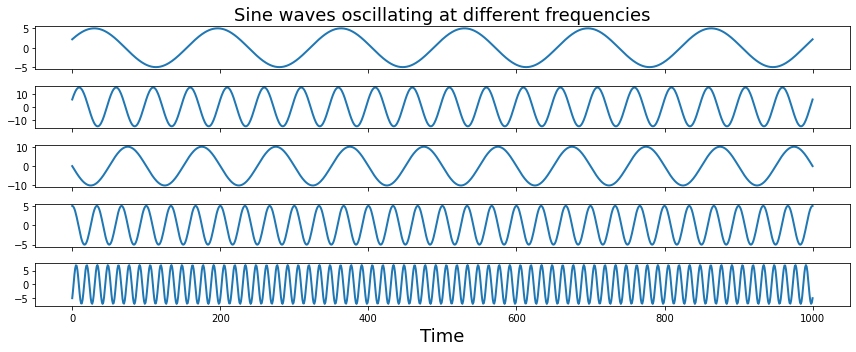

In [34]:
#@markdown B. Creating multiple simple waves: Sampling rate = 500 HZ
import numpy as np

sampling_freq = 500

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


f,a = plt.subplots(nrows=5, ncols=1, figsize=(12,5), sharex=True)
for i,x in enumerate(freq):
    a[i].plot(sine_waves[i,:], linewidth=2)
a[0].set_title("Sine waves oscillating at different frequencies", fontsize=18)
a[i].set_xlabel("Time", fontsize=18)
plt.tight_layout()

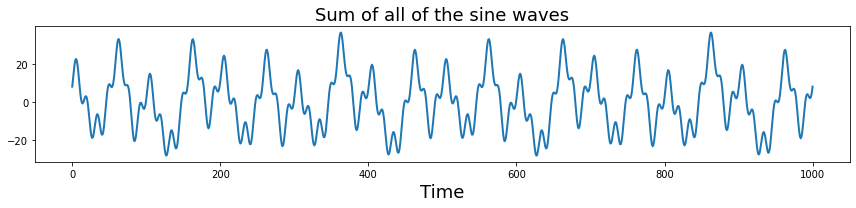

In [35]:
#@markdown C. Let's add all of those signals together to get a more complex signal.
plt.figure(figsize=(12,3))
plt.plot(np.sum(sine_waves, axis=0), linewidth=2)
plt.xlabel('Time', fontsize=18)
plt.title("Sum of all of the sine waves", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.tight_layout()

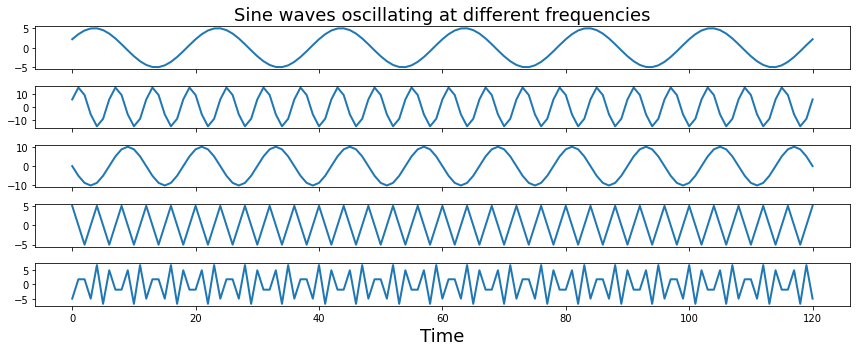

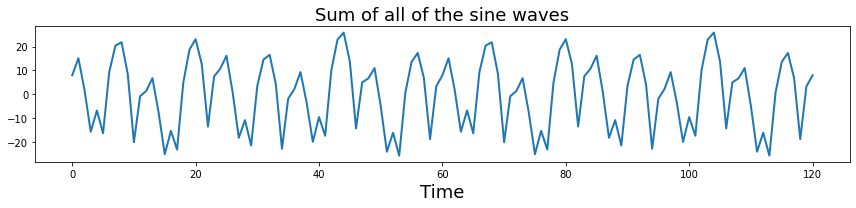

In [36]:
#@markdown D. Downsampling from 500 Hz to 60 Hz (downsampling)

sampling_freq = 60

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


f,a = plt.subplots(nrows=5, ncols=1, figsize=(12,5), sharex=True)
for i,x in enumerate(freq):
    a[i].plot(sine_waves[i,:], linewidth=2)
a[0].set_title("Sine waves oscillating at different frequencies", fontsize=18)
a[i].set_xlabel("Time", fontsize=18)
plt.tight_layout()    


plt.figure(figsize=(12,3))
plt.plot(np.sum(sine_waves, axis=0), linewidth=2)
plt.title("Sum of all of the sine waves", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.tight_layout()    


Text(0.5, 0, 'Time')

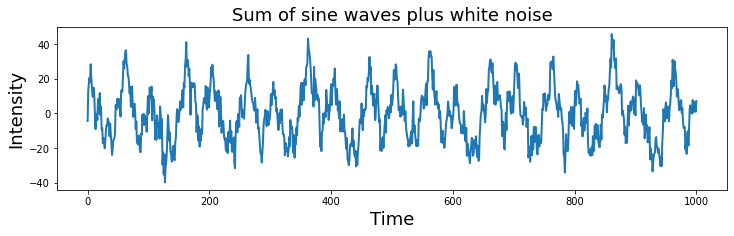

In [37]:
#@markdown E. More realistic sound waves (with Gaussian white noise = closer to real speech sound)
sampling_freq = 500

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


noise = 5 * np.random.randn(sine_waves.shape[1])
signal = np.sum(sine_waves,axis=0) + noise

plt.figure(figsize=(12,3))
plt.plot( signal, linewidth=2)
plt.title("Sum of sine waves plus white noise", fontsize=18)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)

Time in samples: 12480.0 ~ 19200.0


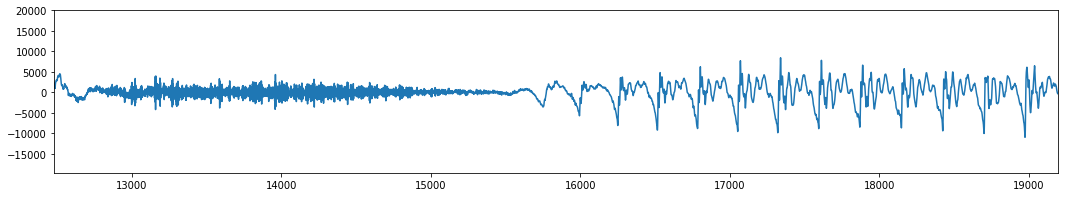

In [38]:
#@markdown 🔄 Real speech audio: Zoom in the waveform (0.52~0.8 seconds = 23000 ~ 35000 samples)
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Read the waveform data
rate, data = wavfile.read('/content/sample.wav')

# Plot the waveform
fig, ax = plt.subplots(figsize = (18,3))

ax.plot(data)

# Set the x-axis limits to zoom in on a specific time period
start_time = 0.52 # start time in seconds
end_time = 0.8 # end time in seconds

st = float(start_time)
et = float(end_time)
stsam = (24000*(st*1000)/1000)
etsam = (24000*(et*1000)/1000)

ax.set_xlim(start_time * rate, end_time * rate)

print("Time in samples: {} ~ {}".format(stsam, etsam))
plt.show()



---


# 📘 Topic [3]: Studies of sound


---



In [ ]:
#@markdown 💠 Lecture slide (#12)
from IPython.display import Image
Image(url='https://github.com/MK316/workshops/raw/main/20230126_yonsei/slides/slides.012.jpeg', width=800, height=600)

In [ ]:
#@markdown **1) Articulatory phonetics:** Video (30 seconds.)
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("wYwk07QM4rc", width=600)
display(video)


**2) Acoustic phonetics: Doing phonetics using computer**

In [ ]:
#@markdown 💠 Lecture slide (#13)
from IPython.display import Image
Image(url='https://github.com/MK316/workshops/raw/main/20230126_yonsei/slides/slides.013.jpeg', width=800, height=600)

**Praat (software):** used for analyzing speech and other sounds. [Software download](https://www.fon.hum.uva.nl/praat/)   
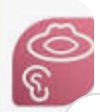

* **open-source** software.
* on both **MAC, Windows**
* measuring **pitch, formants, intensity, and duration**; spectrogram analysis, pitch detection, formant analysis, and more.
* widely used in **phonetics, speech therapy, and other fields that involve sound analysis.**
* includes a built-in **scripting language** for automating and extending its functionality.
* a powerful tool for **sound analysis and manipulation.**



## Example #1: VOT and Pitch in Korean stop sounds  

In [46]:
#@markdown 예문: "**바**다가 보인다", "**파**도가 보인다", "**빠**리가 보인다"
mytext = "바다가 보인다. 파도가 보인다. 빠리가 보인다."
ktts(mytext)

In [ ]:
#@markdown 💠 Praat annotation (#Slide 8)
from IPython.display import Image
Image(url='https://github.com/MK316/workshops/raw/main/20230126_yonsei/data/tone01.png', width=900, height=600)

## 🌀 Parselmouth: to see the Python demo of spectral analysis, follow [this link](https://github.com/MK316/workshops/blob/main/20230126_yonsei/display_speech.ipynb)

+ Create audio file
+ Display spectrogram with intensity
+ Display spectrogram with pitch

# 🌀 SEOUL Corpus

[Link to download the corpus](https://www.openslr.org/113/)

In [ ]:
#@markdown 💠 Lecture slide (#8) SEOUL Corpus
from IPython.display import Image

pages = "7" #@param = ["7", "8", "9"]
adds = ['https://github.com/MK316/workshops/raw/main/20230126_yonsei/slides/slides.014.jpeg',
        'https://github.com/MK316/workshops/raw/main/20230126_yonsei/data/seoulcorpus01.png',
        'https://github.com/MK316/workshops/raw/main/20230126_yonsei/data/seoulcorpus02.png']

if pages == "7":
  add = adds[0]
elif pages == "8":
  add = adds[1]
elif pages == "9":
  add = adds[2]

Image(url=add, width=900, height=600)

# 🍎 References


1. Praat manual [weblink](https://www.fon.hum.uva.nl/praat/manual/Intro.html), Tutorials by others [weblink](https://www.fon.hum.uva.nl/praat/manualsByOthers.html)
2. Python and phonetics [고려대 남호성 교수님 NAMZ channel](https://www.youtube.com/@namz8170): 문과생을 위한 파이썬 프로그래밍, 영어음성학응용 등
3. [서울코퍼스의 한국어파열음 연구](https://www.kci.go.kr/kciportal/ci/sereArticleSearch/ciSereArtiView.kci?sereArticleSearchBean.artiId=ART002590755)
4. 참고도서 [Praat & Scripting)](https://product.kyobobook.co.kr/detail/S000061775813)
5. [Seoul Corpus to download](https://www.openslr.org/113/)
6. Praat KOCW College [영남대 윤규철교수님 강의](http://www.kocw.net/home/search/search.do)
7. Praat lectures / scripts [부산대 양병곤 교수님](http://fonetiks.info/praat/)
8. [Signal Processing](https://colab.research.google.com/github/ljchang/dartbrains/blob/master/content/Signal_Processing.ipynb#scrollTo=BcsjBMJGhoh3)




---

#➡️ Move on to the [second part](https://github.com/MK316/workshops/blob/133af556f3f28930a4bf59ea5f6962465c3515fd/20230126_yonsei/ILIS_139th_Part2.ipynb)